## Análisis de perfiles de tuiter

In [35]:
#Librerías de Python usadas para este análisis
import pandas as pd #Libreria para leer y analizar
import numpy as np #Libreria matematica
import matplotlib.pyplot as plt #Libreria para graficar
import os #Librería para facilitar la ubicación de los archivos

In [2]:
#Instrucciones para dar formato a las gráficas
plt.rc('axes', labelsize=22)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=16)

In [34]:
#A partir de aquí Python sabe en que carpeta se encuentran los datos
os.chdir("/home/christian/Documentos/learn_to/analisis_datos_sociales/Corpus_seleccionado/plebiLaura/")
os.getcwd()

'/home/christian/Documentos/learn_to/analisis_datos_sociales/Corpus_seleccionado/plebiLaura'

### Lectura de los datos

#### Todos X la Paz 

In [28]:
#Lectura de los archivos
df= pd.read_json(r"todosxlapazcol.json")

In [29]:
#Así podemos ver las primeras cinco líneas de los archivos
df.head()

,created_at,favorite_count,followers_count,id_str,in_reply_to_screen_name,retweet_count,screen_name,text
0,2016-10-27 13:56:22,2,2602,791639681154813952,None,1,todosxlapazcol,Camilo entrega petición para que Jorge Barón l...
1,2016-10-20 23:01:08,9,2602,789240061057441792,None,9,todosxlapazcol,"""¡Paz, Paz, Colombia quiere Paz!"" Los colombia..."
2,2016-10-20 22:43:54,26,2602,789235724352688128,None,18,todosxlapazcol,"Jóvenes, viejos.. Aquí ya no hay diferencia. T..."
3,2016-10-20 22:23:52,4,2602,789230681612320768,None,5,todosxlapazcol,Arrancó la #GranMarchaColombiaPacifica. ¿Ya es...
4,2016-10-20 17:31:40,2,2602,789157148060164096,None,3,todosxlapazcol,¿Ya #EstamosListos para la #GranMarchaColombia...


In [30]:
#Así podemos ver el número de líneas que tiene el archivo y el tipo de variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2690 entries, 0 to 2689
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   created_at               2690 non-null   datetime64[ns]
 1   favorite_count           2690 non-null   int64         
 2   followers_count          2690 non-null   int64         
 3   id_str                   2690 non-null   int64         
 4   in_reply_to_screen_name  8 non-null      object        
 5   retweet_count            2690 non-null   int64         
 6   screen_name              2690 non-null   object        
 7   text                     2690 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 168.2+ KB


In [31]:
#Obtenemos los diez tuits con más retuits
df.nlargest(10, ['retweet_count'])

,created_at,favorite_count,followers_count,id_str,in_reply_to_screen_name,retweet_count,screen_name,text
390,2016-09-30 22:17:15,0,2602,781981261657243648,None,13427,todosxlapazcol,"RT @Pontifex_es: Señor Jesús, extiende la somb..."
17,2016-10-03 03:49:22,0,2602,782789615623278592,None,10041,todosxlapazcol,"RT @JuanManSantos: No me rendiré, seguiré busc..."
2288,2016-06-14 13:29:52,0,2602,742710648811982848,None,6815,todosxlapazcol,RT @Pontifex_es: El futuro de un pueblo supone...
709,2016-09-27 18:56:03,0,2602,780843464615399424,None,5131,todosxlapazcol,"RT @fdbedout: El acuerdo está firmado, ahora n..."
266,2016-10-01 22:05:28,0,2602,782340680349868032,None,4243,todosxlapazcol,RT @FALCAO: Para pensarlo. https://t.co/kJxWHK...
1030,2016-09-23 20:02:02,0,2602,779410517295243264,None,4174,todosxlapazcol,RT @juanes: Absolutamente de acuerdo con Humbe...
995,2016-09-24 22:39:24,0,2602,779812505707278336,None,4140,todosxlapazcol,RT @Tolaymaruja: Dicen que perderemos seguidor...
791,2016-09-27 13:39:30,0,2602,780763798454099968,None,3742,todosxlapazcol,"RT @shakira: ""Se hace camino al andar""... Colo..."
2283,2016-06-14 13:57:59,0,2602,742717725731135488,None,3300,todosxlapazcol,RT @Margaritarosadf: A los que dicen que la pa...
67,2016-10-02 18:56:13,0,2602,782655442849792000,None,2778,todosxlapazcol,"RT @juanes: Por las víctimas, campesinos, sold..."


In [32]:
#Eliminamos algunas columnas que no son de interés en este análisis
df.drop(['followers_count', 'id_str', 'in_reply_to_screen_name'], axis=1, inplace=True)

In [8]:
df.head()

,created_at,favorite_count,retweet_count,screen_name,text
0,2016-10-27 13:56:22,2,1,todosxlapazcol,Camilo entrega petición para que Jorge Barón l...
1,2016-10-20 23:01:08,9,9,todosxlapazcol,"""¡Paz, Paz, Colombia quiere Paz!"" Los colombia..."
2,2016-10-20 22:43:54,26,18,todosxlapazcol,"Jóvenes, viejos.. Aquí ya no hay diferencia. T..."
3,2016-10-20 22:23:52,4,5,todosxlapazcol,Arrancó la #GranMarchaColombiaPacifica. ¿Ya es...
4,2016-10-20 17:31:40,2,3,todosxlapazcol,¿Ya #EstamosListos para la #GranMarchaColombia...


In [10]:
#Librería para extraer información del cuerpo del tuit
import re

In [11]:
#Así se genera una columna con los hashtag usados en el tuit
df['hashtag'] = df['text'].apply(lambda x: re.findall(r'#(\w+)', x)) 

In [12]:
df.head()

,created_at,favorite_count,retweet_count,screen_name,text,hashtag
0,2016-10-27 13:56:22,2,1,todosxlapazcol,Camilo entrega petición para que Jorge Barón l...,[]
1,2016-10-20 23:01:08,9,9,todosxlapazcol,"""¡Paz, Paz, Colombia quiere Paz!"" Los colombia...",[EstamosListos]
2,2016-10-20 22:43:54,26,18,todosxlapazcol,"Jóvenes, viejos.. Aquí ya no hay diferencia. T...","[EstamosListos, GranMarchaColombiaPacifica]"
3,2016-10-20 22:23:52,4,5,todosxlapazcol,Arrancó la #GranMarchaColombiaPacifica. ¿Ya es...,"[GranMarchaColombiaPacifica, EstamosListos]"
4,2016-10-20 17:31:40,2,3,todosxlapazcol,¿Ya #EstamosListos para la #GranMarchaColombia...,"[EstamosListos, GranMarchaColombiaPacifica]"


In [13]:
#Así se genera una columna con los enlaces que se encuentran en el tuit. Esos hiperenlaces, 
#en algunos casos, direccionan a una imagen
df['URL'] = df['text'].apply(lambda x: re.findall(r'((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', x)) 

In [33]:
df.head()

,created_at,favorite_count,retweet_count,screen_name,text
0,2016-10-27 13:56:22,2,1,todosxlapazcol,Camilo entrega petición para que Jorge Barón l...
1,2016-10-20 23:01:08,9,9,todosxlapazcol,"""¡Paz, Paz, Colombia quiere Paz!"" Los colombia..."
2,2016-10-20 22:43:54,26,18,todosxlapazcol,"Jóvenes, viejos.. Aquí ya no hay diferencia. T..."
3,2016-10-20 22:23:52,4,5,todosxlapazcol,Arrancó la #GranMarchaColombiaPacifica. ¿Ya es...
4,2016-10-20 17:31:40,2,3,todosxlapazcol,¿Ya #EstamosListos para la #GranMarchaColombia...


### Filtrado de los datos

In [38]:
#Se eligen los tuits generados antes del 2 de octubre a las 23:59:59

df_cut= df[df["created_at"]<="2016-10-02 23:59:59"]

In [39]:
#Se filtran los tuits en los tres periodos de interés

df1=df[(df["created_at"]>="2016-01-01 00:00:00") & (df["created_at"]<="2016-04-30 23:59:59")]
df2=df[(df["created_at"]>="2016-05-01 00:00:00") & (df["created_at"]<="2016-07-31 23:59:59")]
df3=df[(df["created_at"]>="2016-08-01 00:00:00") & (df["created_at"]<="2016-10-02 23:59:59")]

In [40]:
#Se imprimen el número de tuits resultante por periodo de tiempo

print("numero total de tuits", df.shape[0])
print("numero de tuits hasta el 02-10", df_cut.shape[0])
print("numero de tuits, primer periodo", df1.shape[0])
print("numero de tuits, segundo periodo", df2.shape[0])
print("numero de tuits, tercer periodo", df3.shape[0])

numero total de tuits 2690
numero de tuits hasta el 02-10 2672
numero de tuits, primer periodo 125
numero de tuits, segundo periodo 467
numero de tuits, tercer periodo 2080


In [43]:
#Se extrae aleatoriamente el 20% de los tuits para el periodo uno

rn1=int(df1.shape[0]*0.2)
df_cut_1=df1.sample(n=rn1)
df_cut_1.to_csv('/home/christian/Documentos/TodosPorLaPaz_P1.csv')

In [46]:
#Se extrae aleatoriamente el 20% de los tuits para el periodo dos


rn2=int(df2.shape[0]*0.2)
df_cut_2=df2.sample(n=rn2)
df_cut_2.to_csv('/home/christian/Documentos/TodosPorLaPaz_P2.csv')

In [47]:
#Se extrae aleatoriamente el 20% de los tuits para el periodo tres


rn3=int(df3.shape[0]*0.2)
df_cut_3=df3.sample(n=rn3)
df_cut_3.to_csv('/home/christian/Documentos/TodosPorLaPaz_P3.csv')

In [49]:
#Número de tuit elegidos por periodo

print(df_cut_1.shape[0], df_cut_2.shape[0], df_cut_3.shape[0])

25 93 416


In [50]:
#Diez tuits más retuitiados por cada periodo

df_cut_1_RT=df1.nlargest(10, ['retweet_count'])
df_cut_2_RT=df2.nlargest(10, ['retweet_count'])
df_cut_3_RT=df3.nlargest(10, ['retweet_count'])

In [52]:
df_cut_1_RT.to_csv('/home/christian/Documentos/TodosPorLaPaz_P1.csv')
df_cut_2_RT.to_csv('/home/christian/Documentos/TodosPorLaPaz_P2.csv')
df_cut_3_RT.to_csv('/home/christian/Documentos/TodosPorLaPaz_P3.csv')

### Grafica de la frecuencia de tuits

- En cada franja se muestra cada uno de los periodos graficados. En morado el periodo 1, en azul oscuro y claro los periodos 2 y 3, respectivamente.

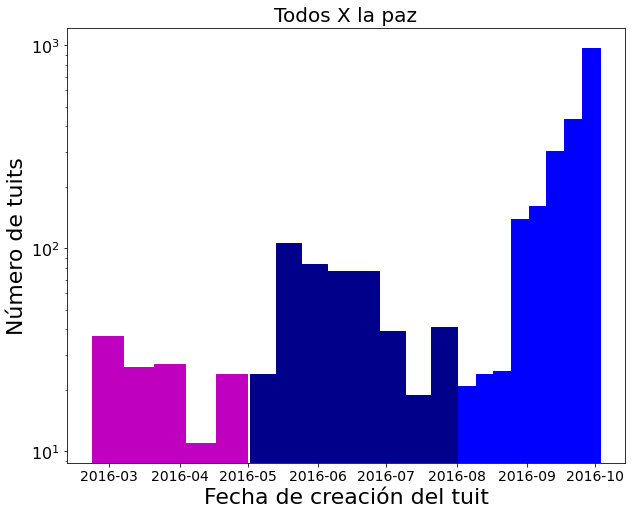

In [53]:
plt.figure(figsize=(10,8))
plt.hist(df1["created_at"], bins=5, histtype='step', color="m", linewidth=1, fill=True);
plt.hist(df2["created_at"], bins=8, histtype='step', color="darkblue", linewidth=1, fill=True);
plt.hist(df3["created_at"], bins=8, histtype='step', color="b", linewidth=1, fill=True)
plt.yscale('log')
plt.title("Todos X la paz", fontsize=20)
plt.xlabel("Fecha de creación del tuit")
plt.ylabel("Número de tuits")
plt.show()

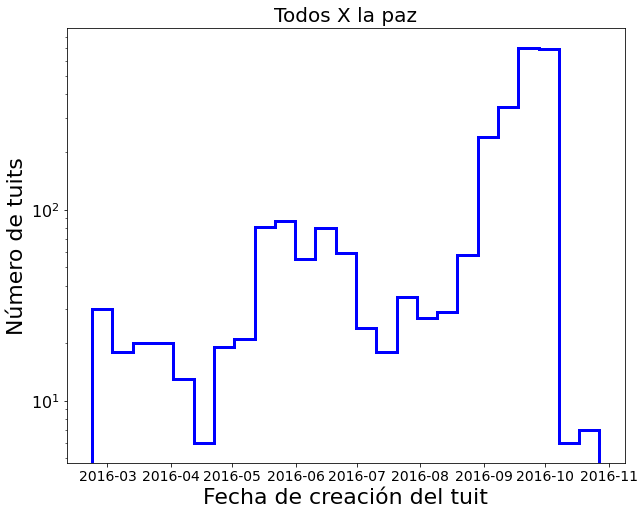

In [54]:
plt.figure(figsize=(10,8))
plt.hist(df["created_at"], bins=25, color="blue", histtype='step', linewidth=3, fill=False);
plt.yscale("log")
plt.title("Todos X la paz", fontsize=20)
plt.xlabel("Fecha de creación del tuit")
plt.ylabel("Número de tuits")
plt.savefig("grafica_paper.png", dpi=300)
plt.show()

In [58]:
#plt.hist(df["created_at"], bins=25, color="blue", histtype='step', linewidth=3, fill=False);

#### Evolución temporal de los tuis

In [56]:
x=[16853.54759259, 16863.4689213 , 16873.39025   , 16883.3115787 ,
        16893.23290741, 16903.15423611, 16913.07556481, 16922.99689352,
        16932.91822222, 16942.83955093, 16952.76087963, 16962.68220833,
        16972.60353704, 16982.52486574, 16992.44619444, 17002.36752315,
        17012.28885185, 17022.21018056, 17032.13150926, 17042.05283796,
        17051.97416667, 17061.89549537, 17071.81682407, 17081.73815278,
        17091.65948148]
y=[ 30.,  18.,  20.,  20.,  13.,   6.,  19.,  21.,  81.,  87.,  55.,
         80.,  59.,  24.,  18.,  35.,  27.,  29.,  58., 239., 342., 703.,
        693.,   6.,   7.]

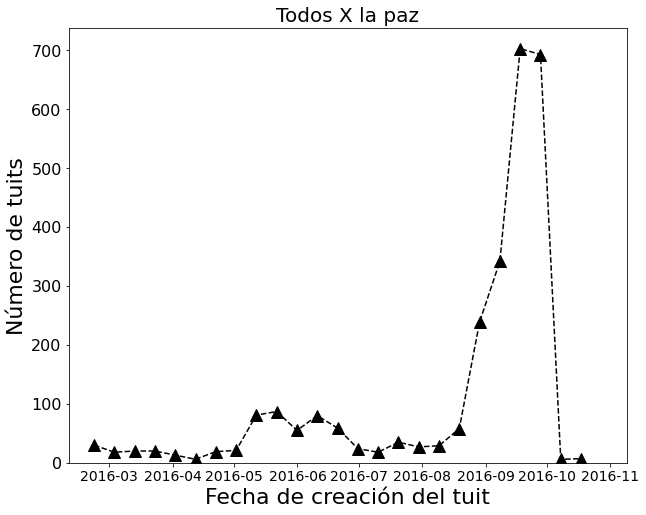

In [57]:
plt.figure(figsize=(10,8))

plt.hist(df["created_at"], bins=25, color="white", histtype='step', linewidth=3, fill=False);

plt.plot(x,y, '--k', marker = '^', markersize = '12')

plt.title("Todos X la paz", fontsize=20)
plt.xlabel("Fecha de creación del tuit")
plt.ylabel("Número de tuits")
plt.savefig("/home/christian/Documentos/learn_to/analisis_datos_sociales/grafica_paper.png", dpi=600)
plt.show()